# Setup

加载谷歌云端硬盘，并更改工作目录

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/ColabNotebooks/benchmarking_pytorchvideo_and_mmaction2')

Import

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

import re

从benchmarking中读取数据

In [23]:
def read_model_benchmark(model_name: str):
  """从benchmarking.txt中读取某个模型的lantecy和throughput数据"""
  with open("results/benchmarking.txt", "r") as f:
    isExist = False
    line_num = 0

    for line in f:
      line_num += 1
      if model_name in line:
        isExist = True
        break
    
    if not isExist:
      print(f'{model_name} does not exist!')
      return
    
    latencies = []
    throughputs = []

    lines = f.readlines()
    # 读取每一次infer的latency和throughput的值
    for i in range(20):
      line = lines[i]
      # 提取所有的数字
      nums = re.findall(r"\d+\.?\d*", line)
      latencies.append(float(nums[0]))
      throughputs.append(float(nums[1]))
    
    total_batches, batch_size = (int(i) for i in re.findall(r"\d+\.?\d*", lines[22]))
    total_latency = float(re.findall(r"\d+\.?\d*", lines[23])[0])
    total_throughput = float(re.findall(r"\d+\.?\d*", lines[24])[0])
    latency_50 = float(re.findall(r"\d+\.?\d*", lines[25])[1])
    latency_95 = float(re.findall(r"\d+\.?\d*", lines[26])[1])
    latency_99 = float(re.findall(r"\d+\.?\d*", lines[27])[1])

    return {
        'latencies': latencies, 
        'throughputs': throughputs, 
        'total_batches': total_batches, 
        'batch_size': batch_size, 
        'total_latency': total_latency, 
        'total_throughput': total_throughput, 
        'latency_50': latency_50, 
        'latency_95': latency_95, 
        'latency_99': latency_99
    }

In [24]:
mmaction2_tsn_info = read_model_benchmark('mmaction2_tsn')
mmaction2_slowfast_info = read_model_benchmark('mmaction2_slowfast')
mmaction2_x3d_info = read_model_benchmark('mmaction2_x3d')
mmaction2_slowonly_info = read_model_benchmark('mmaction2_slowonly')
pytorchvideo_slowfast_info = read_model_benchmark('pytorchvideo_slowfast')
pytorchvideo_x3d_info = read_model_benchmark('pytorchvideo_x3d')
pytorchvideo_slow_info = read_model_benchmark('pytorchvideo_slow')

# Visualization

## Setup

In [49]:
def draw_latencies_and_throughputs(name, latencies, throughputs):
  plt.figure(figsize=(7,5))

  plt.subplot(211)
  plt.xticks(range(1, 21))
  plt.plot(range(1, 21), latencies, label='latency')
  plt.grid(True)
  plt.legend(loc=0)
  plt.axis('tight')
  plt.ylabel('sec')

  plt.title(f'{name}\'s info')

  plt.subplot(212)
  plt.xticks(range(1, 21))
  plt.plot(range(1, 21), throughputs, 'g', lw=1, label='throughput')
  plt.grid(True)
  plt.legend(loc=0)
  plt.axis('tight')
  plt.xlabel('num')
  plt.ylabel('req/sec')

  plt.savefig(f'results/{name}.jpg')
  plt.show()

## mmaction2_tsn

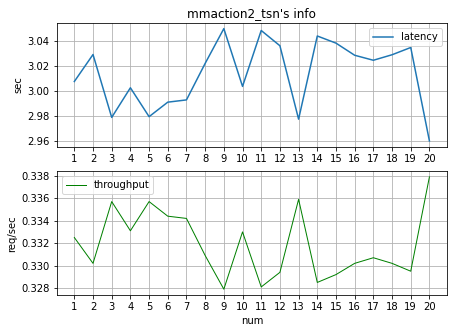

In [50]:
draw_latencies_and_throughputs('mmaction2_tsn', mmaction2_tsn_info['latencies'], mmaction2_tsn_info['throughputs'])

## mmaction2_slowfast

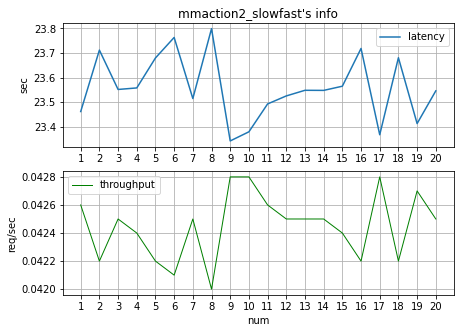

In [51]:
draw_latencies_and_throughputs('mmaction2_slowfast', mmaction2_slowfast_info['latencies'], mmaction2_slowfast_info['throughputs'])

## mmaction2_x3d

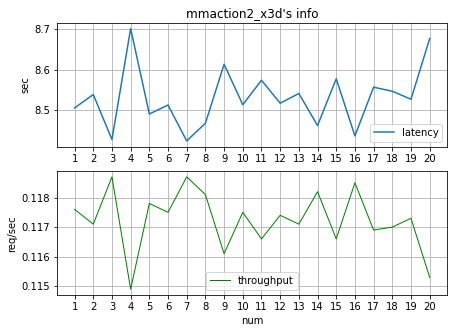

In [52]:
draw_latencies_and_throughputs('mmaction2_x3d', mmaction2_x3d_info['latencies'], mmaction2_x3d_info['throughputs'])

## mmaction2_slowonly

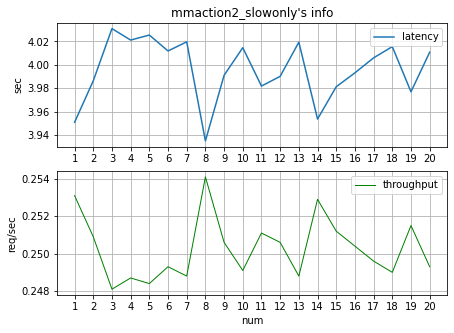

In [53]:
draw_latencies_and_throughputs('mmaction2_slowonly', mmaction2_slowonly_info['latencies'], mmaction2_slowonly_info['throughputs'])

## pytorchvideo_slowfast

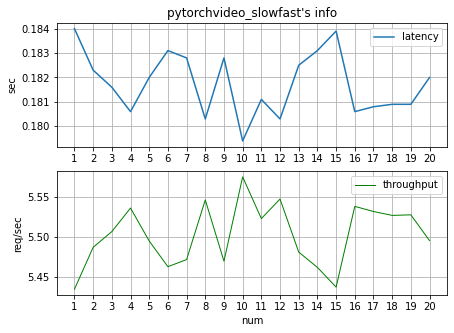

In [54]:
draw_latencies_and_throughputs('pytorchvideo_slowfast', pytorchvideo_slowfast_info['latencies'], pytorchvideo_slowfast_info['throughputs'])

## pytorchvideo_x3d

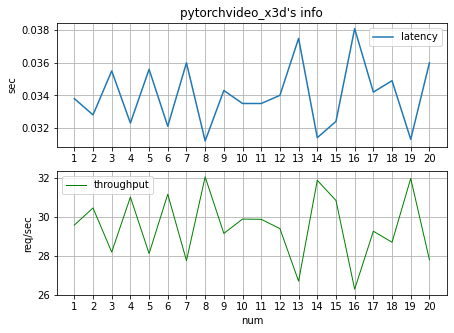

In [55]:
draw_latencies_and_throughputs('pytorchvideo_x3d', pytorchvideo_x3d_info['latencies'], pytorchvideo_x3d_info['throughputs'])

## pytorchvideo_slow

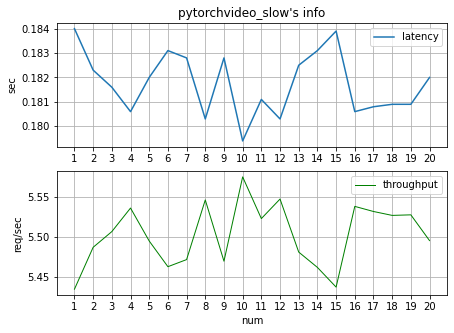

In [56]:
draw_latencies_and_throughputs('pytorchvideo_slow', pytorchvideo_slow_info['latencies'], pytorchvideo_slow_info['throughputs'])

## Summarize

In [57]:
model_names = [
               'mmaction2_tsn', 
               'mmaction2_slowfast', 
               'mmaction2_x3d', 
               'mmaction2_slowonly', 
               'pytorchvideo_slowfast', 
               'pytorchvideo_x3d', 
               'pytorchvideo_slow'
]

In [58]:
total_latencies = [
               mmaction2_slowfast_info['total_latency'], 
               mmaction2_tsn_info['total_latency'], 
               mmaction2_x3d_info['total_latency'], 
               mmaction2_slowonly_info['total_latency'], 
               pytorchvideo_slowfast_info['total_latency'], 
               pytorchvideo_x3d_info['total_latency'], 
               pytorchvideo_slow_info['total_latency']    
]
total_throughputs = [
               mmaction2_slowfast_info['total_throughput'], 
               mmaction2_tsn_info['total_throughput'], 
               mmaction2_x3d_info['total_throughput'], 
               mmaction2_slowonly_info['total_throughput'], 
               pytorchvideo_slowfast_info['total_throughput'], 
               pytorchvideo_x3d_info['total_throughput'], 
               pytorchvideo_slow_info['total_throughput']    
]
latencies_50 = [
               mmaction2_slowfast_info['latency_50'], 
               mmaction2_tsn_info['latency_50'], 
               mmaction2_x3d_info['latency_50'], 
               mmaction2_slowonly_info['latency_50'], 
               pytorchvideo_slowfast_info['latency_50'], 
               pytorchvideo_x3d_info['latency_50'], 
               pytorchvideo_slow_info['latency_50']    
]
latencies_95 = [
               mmaction2_slowfast_info['latency_95'], 
               mmaction2_tsn_info['latency_95'], 
               mmaction2_x3d_info['latency_95'], 
               mmaction2_slowonly_info['latency_95'], 
               pytorchvideo_slowfast_info['latency_95'], 
               pytorchvideo_x3d_info['latency_95'], 
               pytorchvideo_slow_info['latency_95']    
]
latencies_99 = [
               mmaction2_slowfast_info['latency_99'], 
               mmaction2_tsn_info['latency_99'], 
               mmaction2_x3d_info['latency_99'], 
               mmaction2_slowonly_info['latency_99'], 
               pytorchvideo_slowfast_info['latency_99'], 
               pytorchvideo_x3d_info['latency_99'], 
               pytorchvideo_slow_info['latency_99']    
]

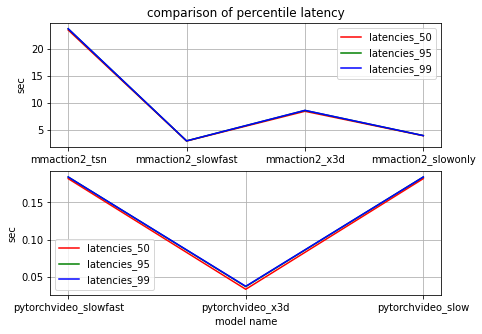

In [81]:
plt.figure(figsize=(7,5))

plt.subplot(211)
plt.plot(model_names[:4], latencies_50[:4], color='r', label='latencies_50')
plt.plot(model_names[:4], latencies_95[:4], color='g', label='latencies_95')
plt.plot(model_names[:4], latencies_99[:4], color='b', label='latencies_99')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.ylabel('sec')

plt.title('comparison of percentile latency')

plt.subplot(212)
plt.plot(model_names[4:], latencies_50[4:], color='r', label='latencies_50')
plt.plot(model_names[4:], latencies_95[4:], color='g', label='latencies_95')
plt.plot(model_names[4:], latencies_99[4:], color='b', label='latencies_99')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('model name')
plt.ylabel('sec')

plt.savefig('results/comparison_of_percentile_latency.jpg')
plt.show()

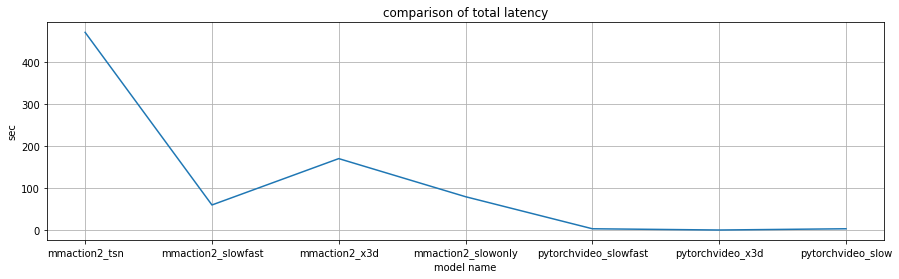

In [82]:
plt.figure(figsize=(15, 4))
plt.plot(model_names, total_latencies, label='total_latencies')
plt.grid(True)
plt.axis('tight')
plt.xlabel('model name')
plt.ylabel('sec')
plt.title('comparison of total latency')

plt.savefig('results/comparison_of_total_latency.jpg')
plt.show()

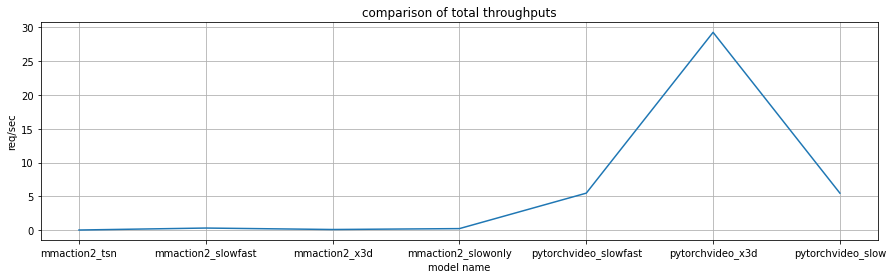

In [83]:
plt.figure(figsize=(15, 4))
plt.plot(model_names, total_throughputs, label='total_throughputs')
plt.grid(True)
plt.axis('tight')
plt.xlabel('model name')
plt.ylabel('req/sec')
plt.title('comparison of total throughputs')

plt.savefig('results/comparison_of_total_throughputs.jpg')
plt.show()

In [85]:
col_names = [
             'total batches', 
             'batch size', 
             'total latency', 
             'total throughput', 
             '50th-percentile latency', 
             '95th-percentile latency', 
             '99th-percentile latency'
]
vals = [
        [
         mmaction2_tsn_info['total_batches'], 
         mmaction2_tsn_info['batch_size'],
         mmaction2_tsn_info['total_latency'],
         mmaction2_tsn_info['total_throughput'],
         mmaction2_tsn_info['latency_50'],
         mmaction2_tsn_info['latency_95'],
         mmaction2_tsn_info['latency_99'],
        ], 
        [
         mmaction2_slowfast_info['total_batches'], 
         mmaction2_slowfast_info['batch_size'],
         mmaction2_slowfast_info['total_latency'],
         mmaction2_slowfast_info['total_throughput'],
         mmaction2_slowfast_info['latency_50'],
         mmaction2_slowfast_info['latency_95'],
         mmaction2_slowfast_info['latency_99'],
        ], 
        [
         mmaction2_x3d_info['total_batches'], 
         mmaction2_x3d_info['batch_size'],
         mmaction2_x3d_info['total_latency'],
         mmaction2_x3d_info['total_throughput'],
         mmaction2_x3d_info['latency_50'],
         mmaction2_x3d_info['latency_95'],
         mmaction2_x3d_info['latency_99'],
        ], 
        [
         mmaction2_slowonly_info['total_batches'], 
         mmaction2_slowonly_info['batch_size'],
         mmaction2_slowonly_info['total_latency'],
         mmaction2_slowonly_info['total_throughput'],
         mmaction2_slowonly_info['latency_50'],
         mmaction2_slowonly_info['latency_95'],
         mmaction2_slowonly_info['latency_99'],
        ], 
        [
         pytorchvideo_slowfast_info['total_batches'], 
         pytorchvideo_slowfast_info['batch_size'],
         pytorchvideo_slowfast_info['total_latency'],
         pytorchvideo_slowfast_info['total_throughput'],
         pytorchvideo_slowfast_info['latency_50'],
         pytorchvideo_slowfast_info['latency_95'],
         pytorchvideo_slowfast_info['latency_99'],
        ], 
        [
         pytorchvideo_x3d_info['total_batches'], 
         pytorchvideo_x3d_info['batch_size'],
         pytorchvideo_x3d_info['total_latency'],
         pytorchvideo_x3d_info['total_throughput'],
         pytorchvideo_x3d_info['latency_50'],
         pytorchvideo_x3d_info['latency_95'],
         pytorchvideo_x3d_info['latency_99'],
        ], 
        [
         pytorchvideo_slow_info['total_batches'], 
         pytorchvideo_slow_info['batch_size'],
         pytorchvideo_slow_info['total_latency'],
         pytorchvideo_slow_info['total_throughput'],
         pytorchvideo_slow_info['latency_50'],
         pytorchvideo_slow_info['latency_95'],
         pytorchvideo_slow_info['latency_99'],
        ]
]

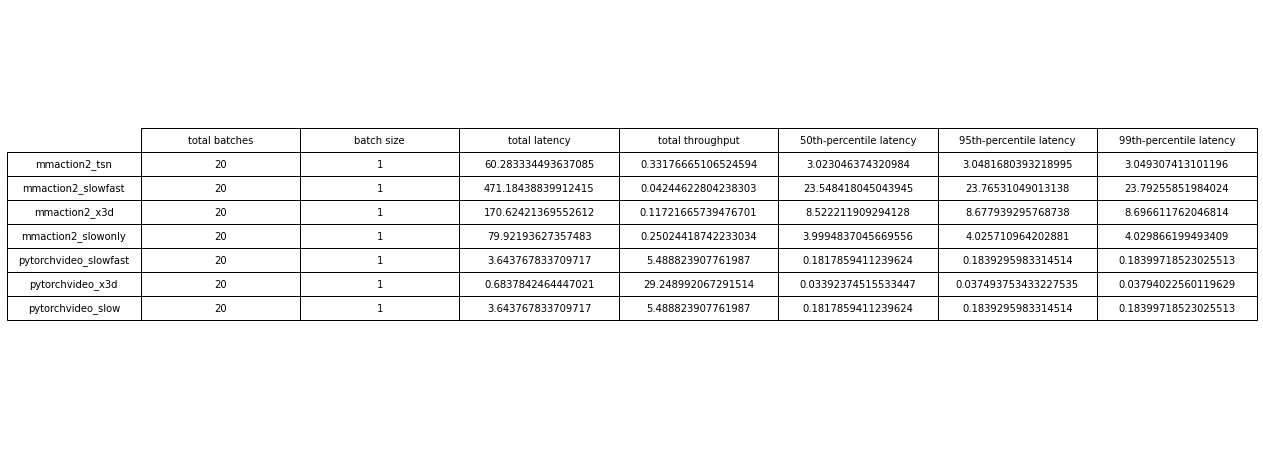

In [87]:
plt.figure(figsize=(20,8))
tab = plt.table(cellText=vals, 
              colLabels=col_names, 
              rowLabels=model_names,
              loc='center', 
              cellLoc='center',
              rowLoc='center')
tab.scale(1,2) 
plt.axis('off')
plt.savefig('results/comparsion_table.jpg')
plt.show()